In [1]:
from flamingo_mini import FlamingoConfig, FlamingoModel, FlamingoProcessor

import json
import matplotlib.pyplot as plt
import torch
from flamingo_mini.utils import load_url
from PIL import Image
from IPython.display import Image as Image_display
from transformers.configuration_utils import PretrainedConfig


In [5]:
#model = FlamingoModel.from_pretrained("../../flamingo-roco-medclip-gpt2-2/checkpoint-56560/")
config = FlamingoConfig(
        clip_model_type='flax-community/medclip-roco',
        lm='microsoft/biogpt',
        dim=1024,
        dim_visual=2048,
        xattn_act='sqrelu',
        resampler_act='sqrelu'
    )
print(isinstance(config,PretrainedConfig))
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
model = FlamingoModel(config)
#model=FlamingoModel(FlamingoConfig)
#device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#model.config.lm='microsoft/biogpt'
#model.config.lm=''
model.to(device)
model.eval()

processor = FlamingoProcessor(model.config)
print(model.config)

True
cuda:0
True
FlamingoConfig {
  "clip_model_type": "flax-community/medclip-roco",
  "dim": 1024,
  "dim_visual": 2048,
  "freeze_language_model": true,
  "freeze_vision_model": true,
  "lm": "microsoft/biogpt",
  "resampler_act": "sqrelu",
  "resampler_depth": 6,
  "resampler_dim_head": 64,
  "resampler_ff_mult": 4,
  "resampler_heads": 8,
  "resampler_num_latents": 64,
  "resampler_num_time_embeds": 4,
  "transformers_version": "4.26.1",
  "xattn_act": "sqrelu",
  "xattn_dim_head": 64,
  "xattn_every": 1,
  "xattn_ff_mult": 4,
  "xattn_heads": 8
}



In [6]:
def eval():
    image=Image.open("/home/leosher/桌面/output1.png")
    prediction_caption = model.generate_captions(processor, images=[image])
    #annotation = open("/Users/sookim/flamingo-pytorch/roco_data/captions_roco_validation.json","r")
    #annotation = json.load(annotation)
    gt = "X-ray hand showing only two carpal bones"

    print("Prediction :", prediction_caption[0])
    print("Ground Truth :", gt)
    return image
from transformers import BioGptModel

torch.Size([1, 2048, 1, 1])
torch.Size([1, 2048, 1, 1])
torch.Size([1, 2048, 1, 1])
torch.Size([1, 2048, 1, 1])
torch.Size([1, 2048, 1, 1])
Prediction : < image > < / image > < / image > < / image > < / image > < / image > < / image > < / image > < / image > < / image > < / image > < / image > < / image > < / image > < / image > < / image > < / image > < / image > < / image > < / image > < / image > < / image > < / image > < / image > < / image > < / image > < / image > < / image > < / image > < / image > < / image > < / image > < / image > < / image > < / image > < / image > < / image > < /
Ground Truth : X-ray hand showing only two carpal bones


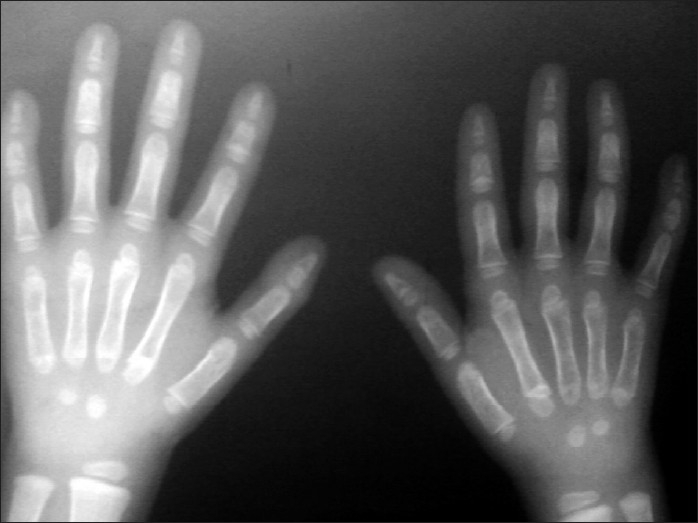

In [7]:
image = eval()
image
